<a href="https://colab.research.google.com/github/IanPerigoUERN/computervision/blob/ian/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial para aprendizado das bases de visão computacional
## Participantes:
### Ian Périgo, Maria Janaína e Yuri Aquino

### Github:
https://github.com/IanPerigoUERN

https://github.com/janainagois

https://github.com/yca-git



# Conteúdo Base:
## Introdução à Visão Computacional com Python e OpenCV" – Diego Mariano
## Documentação do OpenCV: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
## Playlist programação dinâmica: https://www.youtube.com/watch?v=RSkbjZZb-1c&list=PL5TJqBvpXQv729nb3vdeP4E87hLark5q9


# Conteúdo Extra
## OpenCV easy run on Colab with code: https://www.youtube.com/watch?v=E3Lg4aZVCAU&t=6049s
## Introdução a CV em embarcados: https://www.youtube.com/watch?v=apaaljFG0sw
## Reconhecimento de Imagens com Redes Neurais Convolucionais em Python: https://www.deeplearningbook.com.br/reconhecimento-de-imagens-com-redes-neurais-convolucionais-em-python-parte-1/
## Visão computacional - atividade prática: https://www.kaggle.com/code/ricardocesar1992/vis-o-computacional-atividade-pr-tica

# Visão Computacional
### Permitir que máquinas enxerguem e extraiam características do meio
### Complemento da visão biológica
### Campos: neurobiologia, Inteligência artificial, robótica,
## Processamento de imagens:
### realçar bordas, remover ruídos
## Reconhecimento de padrões:
### Identificar e classificar os objetos


# Fluxo de um sistema baseado em visão computacional:
## 1- aquisição de imagem
### sensores,câmeras
### pode ser bidimensional, tridimensional ou sequência de imamgens (vídeos)
## 2-pré-processamento
### Regiões ou Objetos de interesse:
### O que queremos identificar e obter informações. depois de identificados aplicamos técnicas de pré-processamento: destacar bordas e formas geométricas e tratar ruídos para realçar e facilitar a obtenção de informações
## 3-segmentação
### Objetos são segmentados da imagem original e uma ou mais imagens
### Facilitar a extração de características
## 4-extração de características
### características úteis para diferenciar de outros objetos
## 5-reconhecimento de padrões
### processamento de alto nível
### reconhecer o objeto segmentado através de suas características e defini-lo em uma classe
## 6-resultado

# Ver capítulo 3 - aquisição de imagem
## Compreender a forma que câmeras digitais capturam e processam imagens por meio de sensores CCD e CMOS e vários tópicos

# Bibliotecas utilizadas
## OpenCV - Processamento de imagens
## Pillow - Processamento de imagens
## Numpy - Arranjos,vetores e matrizes
## Matplotlib - Gerar gráficos
## Statics - Cálculos estatísticos
## Scikit-Learn - Aprendizado de máquina
## Python-tesseract - Reconhecimento de caracteres

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 #openCV
from google.colab.patches import cv2_imshow #exibição das imagens no browser específico para colab

In [128]:
print (cv2.__version__)

4.11.0


(561, 794, 3)


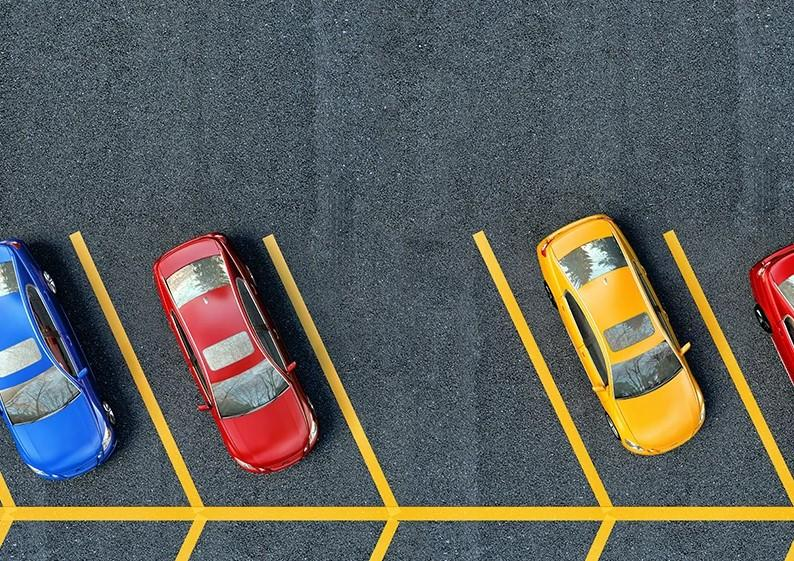

In [129]:
# Carregar imagem a partir de um arquivo

imagem = cv2.imread("/content/drive/MyDrive/imagem2.jpg")

# Exibir dimensões da imagem
print(imagem.shape) # Resultado uma tupla com (height,width,channels)


cv2_imshow(imagem)

(561, 794)


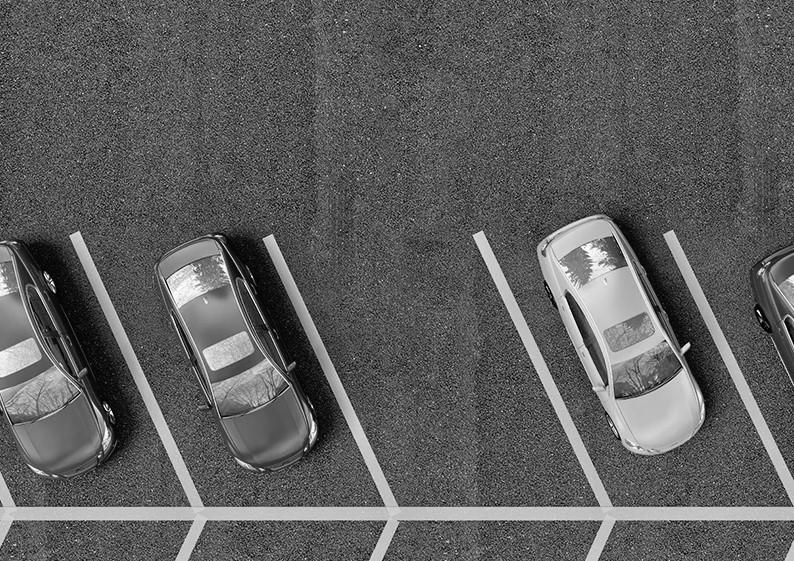

In [130]:
imagemGray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) # Convertendo para tons de cinza

print(imagemGray.shape) # Imagem com apenas um canal = tons de cinza

cv2_imshow(imagemGray)

HSV é um modelo de representação de cores, assim como o mais conhecido RGB (Red, Green, Blue). A sigla HSV significa Hue, Saturation, Value (em português: Matiz, Saturação e Valor).

A grande vantagem do HSV é que ele representa as cores de uma forma muito mais próxima à percepção humana, separando a informação da cor (Matiz) da informação de luminosidade/brilho (Valor).


 H - Hue (Matiz)
O que é? É a cor pura em si. Pense nela como as cores do arco-íris dispostas em um círculo.
Como funciona: A matiz é representada por um ângulo, que vai de 0 a 360 graus (embora em bibliotecas como o OpenCV, esse valor seja mapeado para 0-179 para caber em 8 bits de dados).
0°: Vermelho
60°: Amarelo
120°: Verde
180°: Ciano
240°: Azul
300°: Magenta

Saturation (Saturação)
O que é? É a pureza ou a intensidade da cor. Ela mede o quão "lavada" ou "vibrante" a cor é.
Como funciona: A saturação vai de 0 a 100% (ou de 0 a 255 em 8 bits).
Saturação 100% (ou 255): A cor é totalmente pura e vibrante (ex: um vermelho vivo).
Saturação 0% (ou 0): A cor perde toda a sua "essência" e se torna um tom de cinza.

V - Value (Valor ou Brilho)
O que é? É o brilho da cor, ou seja, o quão clara ou escura ela é.
Como funciona: O valor também vai de 0 a 100% (ou de 0 a 255).
Valor 100% (ou 255): A cor está em seu brilho máximo.
Valor 0% (ou 0): A cor se torna preta, independentemente da matiz ou da saturação.

#Importância:
No modelo RGB, a cor e o brilho estão misturados. Se você pegar um objeto vermelho e levá-lo de um ambiente claro para um escuro, os valores de R, G e B mudarão drasticamente. Isso torna muito difícil para um programa de computador reconhecer que o objeto continua sendo "vermelho".

No modelo HSV, quando a iluminação muda, apenas o componente V (Valor) tende a variar significativamente. O H (Matiz), que representa a cor em si, permanece relativamente constante.

In [131]:
#HSV

HSV_imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

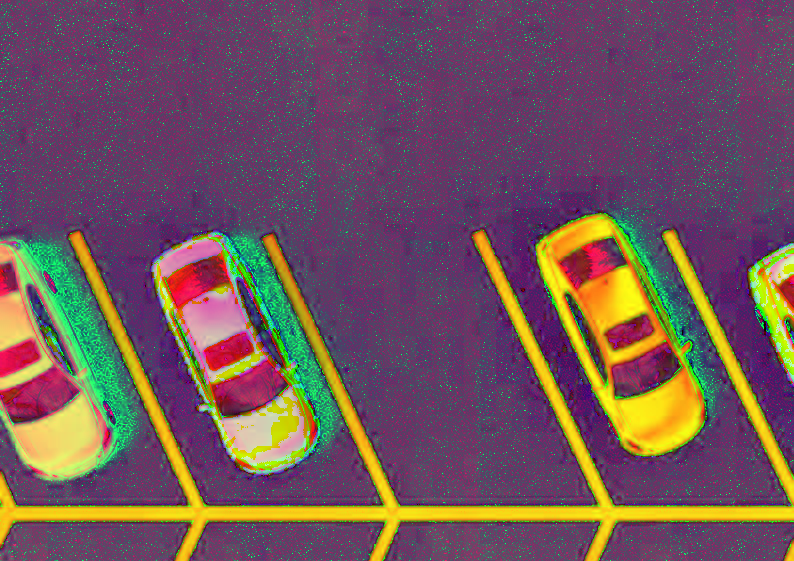

In [132]:
cv2_imshow(HSV_imagem)

# Detecção de borda usando Canny
## Algoritmo multi-estágio

### É aplicado filtro gaussiano: suaviza a imagem e remove pequenos ruídos que poderiam ser identificados como bordas



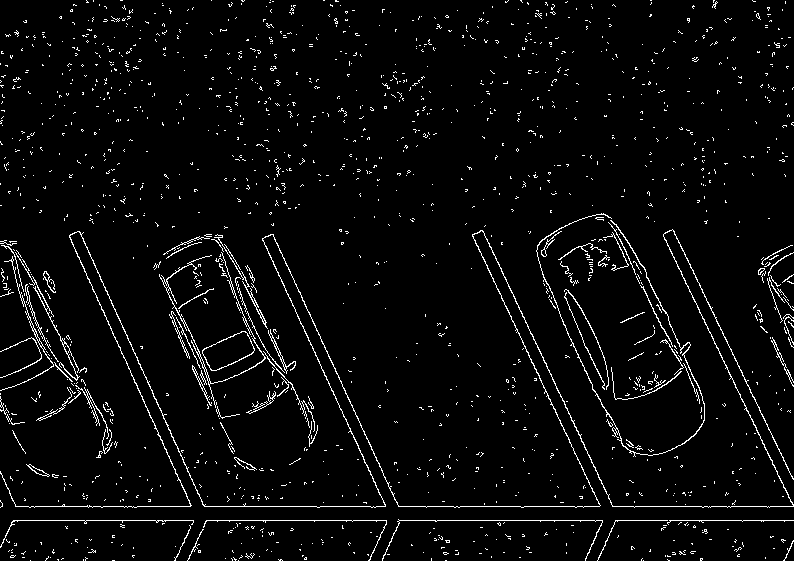

In [147]:

canny_image = cv2.Canny(imagemGray,threshold1=300, threshold2=450, apertureSize=3, L2gradient=False) # Parâmetros de detecção de borda. 1 limiar inferior e 2 limar superior para serem considerados bordas.

cv2_imshow(canny_image)

# Erosão e Dilatação
## Operações morfológicas na pós etapa de segmentação
## Erosão:
### Remoção de pixels além da borda do objeto, o pixel só será mantido caso a matriz de pixels ao redor forem 1, tudo defenido por um Kernel
## Dilatação: Preenchimento de pixels em objetos segmentados, se ao menos 1 pixel ao redor for 1 irá transformar em 1

### Uso do numpy para definição do kernel

In [155]:
# Erosão e dilatação

# Uso do numpy para criação do kernel
kernel = np.ones((1,1), np.uint8)

erosion_image = cv2.erode(canny_image, kernel, iterations =1)

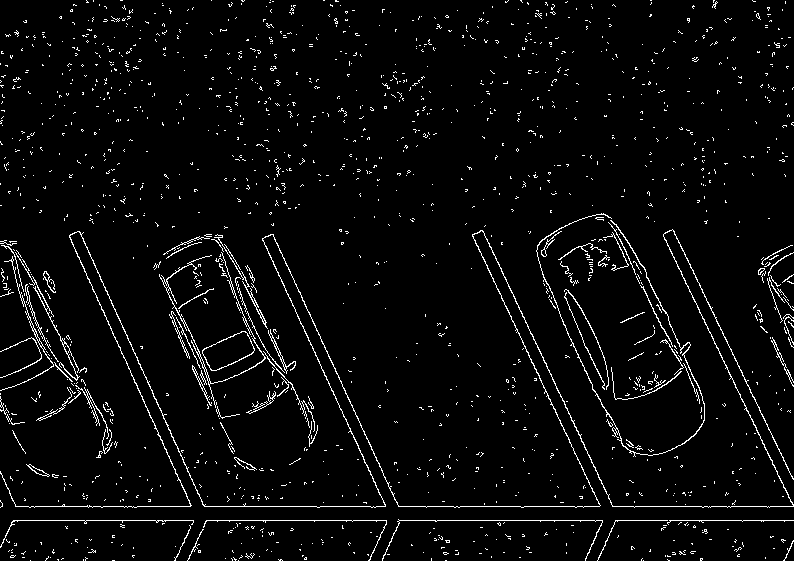

In [161]:
cv2_imshow(erosion_image)

In [162]:
#Dilatação


kernel_dilatacao = np.ones((5,5), np.uint8)

dilatation_img = cv2.dilate(canny_image, kernel_dilatacao, iterations=1)

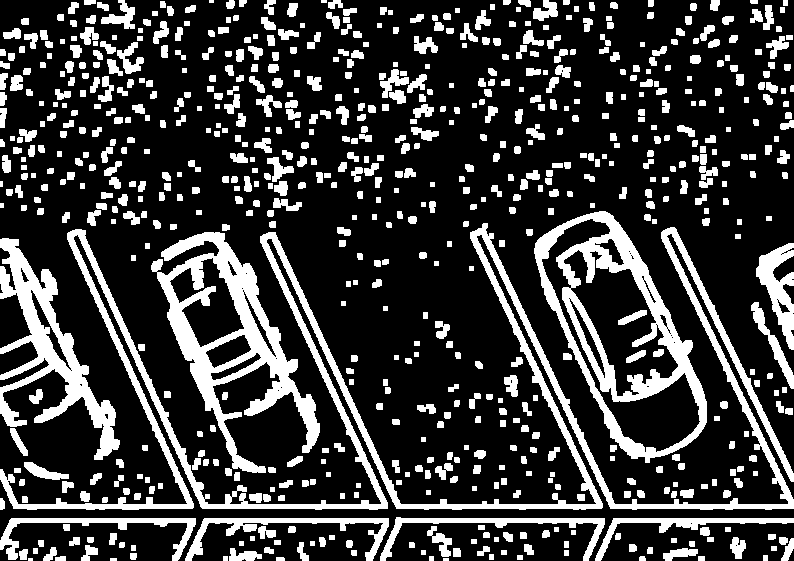

In [163]:
cv2_imshow(dilatation_img)

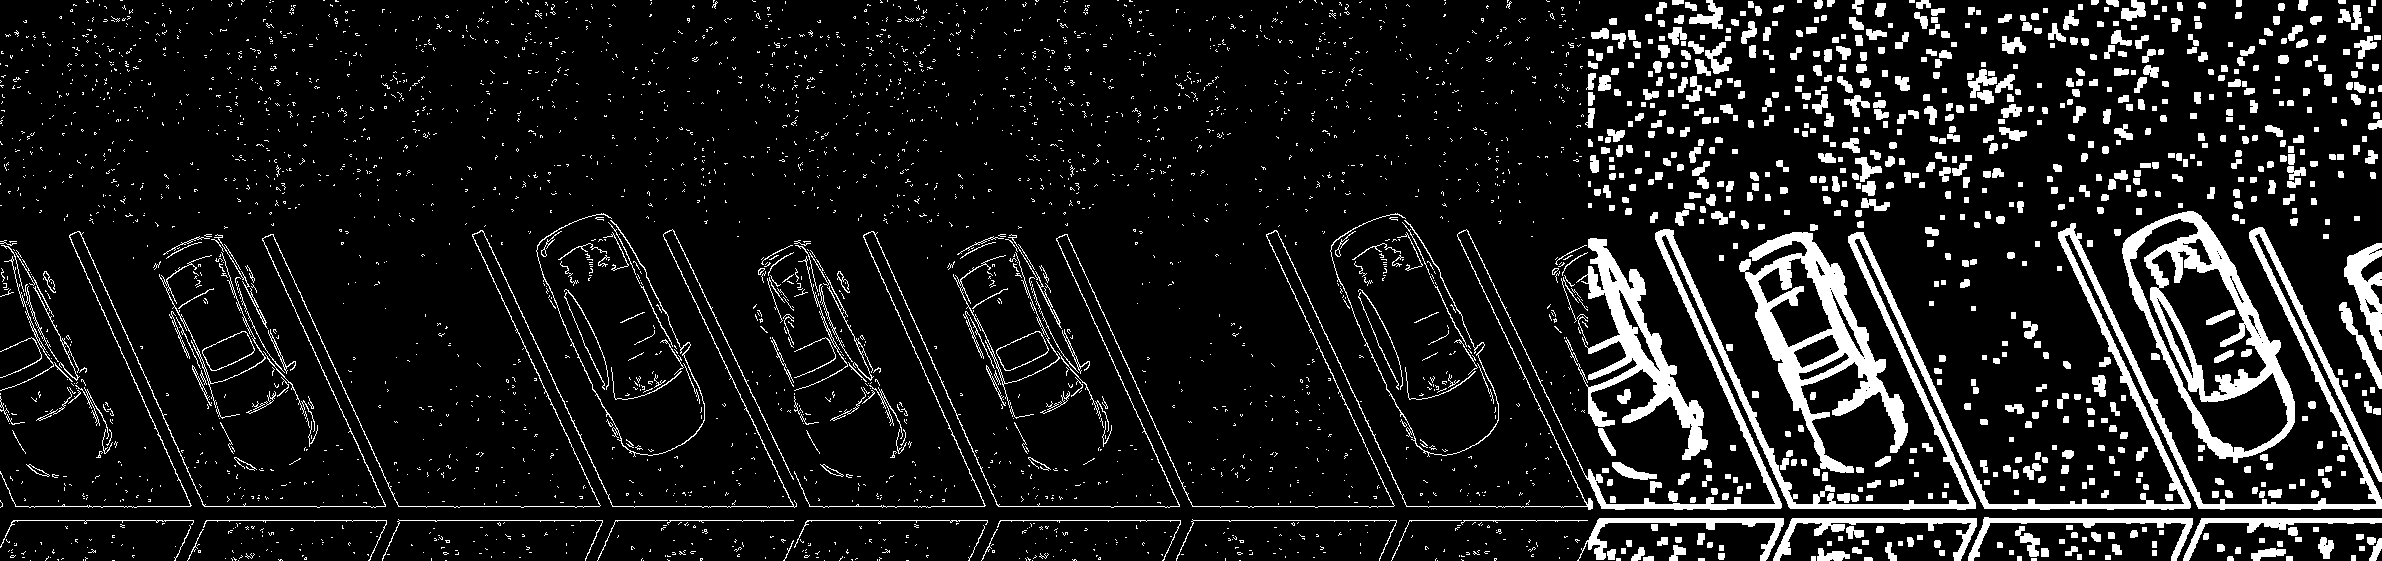

In [165]:
#Dispor imagens lado a lado para comparação

display = np.hstack((canny_image,erosion_image,dilatation_img))

cv2_imshow(display)